# Overview
### In this project, I will use Youtube API to do exploratory analysis of my favorite Youtube channel ("Thu Vu Data Analytics") and answer the following questions:
### Part 1: Compare the channel to 4 related channels
1) Compare the total subscribers <br> 2) Compare the total videos <br> 3) Compare the total views <br> 4) Is there a relationship between number of videos and number of subscribers/total views?
### Part 2: Analyze the channel:
1) What are the top viewed videos? <br> 2) What are the top liked videos? <br> 3) Is there a relationship between number of views and likes? <br> 4) View distribution of uploaded videos <br> 5) Commonly used words in video titles

# Import libraries and API key

In [180]:
from googleapiclient.discovery import build
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
#extract API key & channel ID(s)
api_key = 'your API key'                    #I have deleted my API key. Please input your API key.
channel_ids = ['UCLLw7jmFsvfIVaUFsLs8mlQ',  #Luke Barousse
              'UCJQJAI7IjbLcpsjWdSzYz0Q',   #Thu Vu Data Analytics
              'UC7cs8q-gJRlGwj4A8OmCmXg',   #Alex The Analyst
              'UCvZnwzmc3m1Eush-Or8Z6DA',   #Shashank Kalanithi
              'UCiT9RITQ9PW6BhXK0y2jaeg']   #Ken Jee

In [171]:
api_service_name = 'youtube'
api_version = 'v3'

# Part 1: Compare Thu Vu Data Analytics to other channels:
## 1.1 Get credentials and create API client

In [172]:
youtube = build(api_service_name,api_version,developerKey=api_key)

request = youtube.channels().list(
          part='snippet,contentDetails,statistics',
          id=','.join(channel_ids))

response = request.execute()

# As the result is in JSON format, I use json.dumps to make it easier to read

import json 

y = json.dumps(response,indent=2)

print(y)

{
  "kind": "youtube#channelListResponse",
  "etag": "xnoSP4ftdOL3HoK-_2aFcHedhbg",
  "pageInfo": {
    "totalResults": 5,
    "resultsPerPage": 5
  },
  "items": [
    {
      "kind": "youtube#channel",
      "etag": "IAN7_VfIidUpwvqKIMfgitqYKLw",
      "id": "UC7cs8q-gJRlGwj4A8OmCmXg",
      "snippet": {
        "title": "Alex The Analyst",
        "description": "My name is Alex Freberg and on this channel I will be going over everything you need to know to become a Data Analyst. If you are wanting to make a career change or learn the skills needed to become a Data Analyst, be sure to subscribe to stay up to date on all my latest content.\n\nYou can find me on LinkedIn at:\nhttps://www.linkedin.com/in/alex-freberg/\n\nAlexTheAnalyst.com\nhttps://www.alextheanalyst.com/\n\nDiscord Channel:\nhttps://discord.gg/rxZUjNvRzR\n\nTwitter:\n@Alex_TheAnalyst\n\nSend Me Something:\n431 Saint James Avenue Suite L #318, Goose Creek, SC, 29445\n",
        "customUrl": "@alextheanalyst",
        "

### These are all the statistics of the channel. From here we want to extract channel name, number of subcribers, total views and videos only. 


## 1.2 Extract data

In [173]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = [] #create empty list
    
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    
    response = request.execute()
    
    #loop through items
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],         #create dictionary
                Subscribers = response['items'][i]['statistics']['subscriberCount'],
                Views = response['items'][i]['statistics']['viewCount'],
                Videos = response['items'][i]['statistics']['videoCount'],
                playlist_ids = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return(all_data)

In [174]:
channel_data = pd.DataFrame(get_channel_stats(youtube,channel_ids)) #turn into dataframe
channel_data

,Channel_name,Subscribers,Views,Videos,playlist_ids
0,Shashank Kalanithi,121000,5396211,152,UUvZnwzmc3m1Eush-Or8Z6DA
1,Ken Jee,236000,7628214,260,UUiT9RITQ9PW6BhXK0y2jaeg
2,Thu Vu data analytics,121000,3257597,58,UUJQJAI7IjbLcpsjWdSzYz0Q
3,Alex The Analyst,393000,15216374,194,UU7cs8q-gJRlGwj4A8OmCmXg
4,Luke Barousse,317000,14334985,120,UULLw7jmFsvfIVaUFsLs8mlQ


## 1.3 Data Pre-processing

We want to check and change data types (if needed) for further analysis and visualization.

In [175]:
# Check data types
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Videos          object
playlist_ids    object
dtype: object

In [176]:
#Change Subsribers, Views, Videos to integer
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Videos'] = pd.to_numeric(channel_data['Videos'])

channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Videos           int64
playlist_ids    object
dtype: object

## 1.4 Visualization

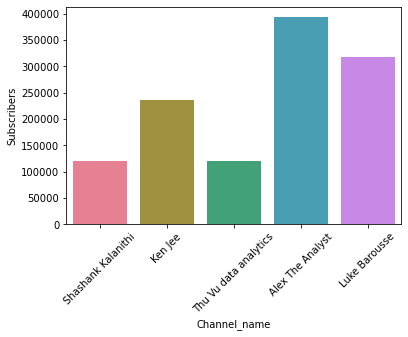

In [186]:
# Compare number of subsribers

pal = sns.husl_palette(n_colors=5)
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data,palette=pal)
plt.xticks(rotation=45)
plt.show()

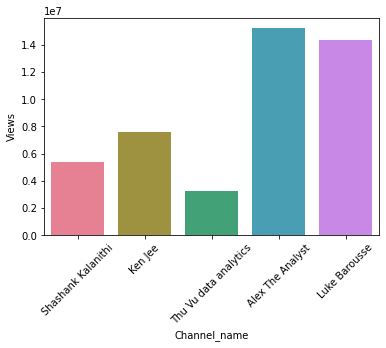

In [189]:
# Commpare number of views
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data,palette=pal)
plt.xticks(rotation=45)
plt.show()

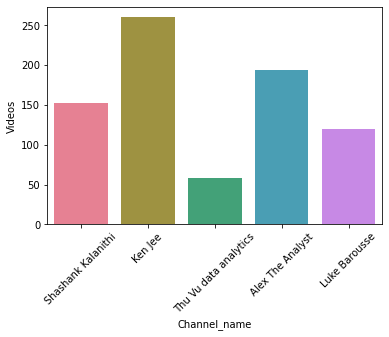

In [190]:
# Commpare number of videos
ax = sns.barplot(x='Channel_name',y='Videos',data=channel_data,palette=pal)
plt.xticks(rotation=45)
plt.show()

## 1.5 Analysis

### In terms of Subscribers: 
Thu Vu Data Analytics has the same amount as Shashank Kalanithi (121K), and both have the lowest compared to 3 other channels. <br>
Alex the Analyst has the highest amount of subscribers (approx. 400K)

### In terms of Views:
Thu Vu Data Analytics has the lowest amount of views (approx. 3.2M). <br>
Alex the Analyst still has the highest amount of views (approx. 15.2M)

### In terms of Videos:
Thu Vu Data Analytics only uploaded 58 views, far fewer than other channels. This might be the reason why she get less subscribers and views. We will do correlation to see if there are any relationships between number of uploaded videos and total views/subcribers.

## 1.6 Correlation model

In [33]:
channel_data[['Videos','Views','Subscribers']].corr()

,Videos,Views,Subscribers
Videos,1.000000,0.293054,0.404211
Views,0.293054,1.000000,0.964603
Subscribers,0.404211,0.964603,1.000000


In [36]:
# Check correlation between number of videos and views (with p-value)
from scipy.stats import pearsonr
pearsonr(channel_data['Videos'],channel_data['Views'])

(0.293054388166175, 0.6322833336442684)

In [37]:
# Check correlation between number of videos and subscribers (with p-value)
from scipy.stats import pearsonr
pearsonr(channel_data['Videos'],channel_data['Subscribers'])

(0.40421085345629837, 0.499722695300188)

Although there is a weak positive relationship between number of videos and total views / subscribers, it is not statistically significant (p-value > 0.05). We cannot conclude that the more videos, the more views and subscribers they get.

# Part 2: Analyze the channel
## 1.1 Extract data

In [39]:
playlist_ids = channel_data.loc[channel_data['Channel_name']=='Thu Vu data analytics','playlist_ids'].iloc[0]

In [40]:
# Get Video IDs

def get_video_ids(youtube,playlist_id):
    request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_ids,
            maxResults=50)

    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken') #if there is value -> return value; if no -> return None
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                      part="contentDetails",
                      playlistId=playlist_ids,
                      maxResults=50,
                      pageToken = next_page_token)
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
                
            next_page_token = response.get('nextPageToken')

    return video_ids

In [50]:
video_ids = get_video_ids(youtube, playlist_ids)

In [107]:
# Get video details

def get_video_details(youtube,video_ids):
    
    all_video_stats = []
    
    for i in range(0,len(video_ids),50): #loop each 50 videos
        request = youtube.videos().list(
                  part="snippet,statistics",
                  id=','.join(video_ids[i:i+50])) #Youtube request can only execute 50 video ids
        response = request.execute()
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']) 
            all_video_stats.append(video_stats)
        
    return all_video_stats

In [108]:
video_data = pd.DataFrame(get_video_details(youtube,video_ids))
video_data.head()

,Title,Views,Likes,Comments
0,Math for Machine Learning and Data Science Spe...,14501,940,45
1,Can ChatGPT Replace Data Scientists? 🤯,45995,1450,182
2,My Entire Process for Doing Data Science Proje...,30981,1438,75
3,How to ACTUALLY Achieve Your Data Science Goal...,19622,778,41
4,Full Stack Data Science Roadmap 2023,119234,4750,154


## 1.2 Data Pre-processing

In [52]:
# Check null data
video_data.isnull().any()

Title             False
Published_date    False
Views             False
Likes             False
Comments          False
dtype: bool

In [53]:
# Check data types
video_data.dtypes

Title             object
Published_date    object
Views             object
Likes             object
Comments          object
dtype: object

In [111]:
# Change data types of Views, Likes, Comments from object to integer
numeric_cols = ['Views','Likes','Comments']
video_data[numeric_cols] = video_data[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis=1)

## 1.3 Visualization

### Views
We will first answer these 2 questions:
1) What are the top viewed videos? <br>
2) View distribution of all videos

In [191]:
pal2 = sns.light_palette("seagreen",10,reverse=True)

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-p

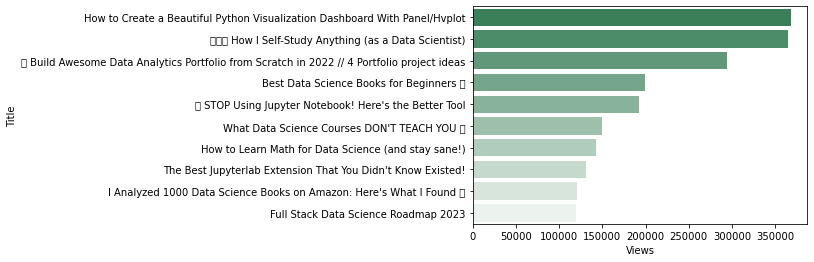

In [192]:
# Top 10 most viewed videos

ax = sns.barplot(x = 'Views', y = 'Title', data = video_data.sort_values('Views',ascending=False).head(10),orient='h',palette=pal2)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Views'>

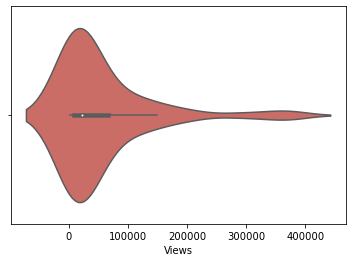

In [193]:
# View distribution per video 
sns.violinplot(video_data['Views'],orient='h')

### Analysis
The channel has 2 videos over 350K and 1 video over 300K views. <br>
Overall, most videos of this channel are only around 50K view, with the median of approx. 22K.

### Likes

We will find out: <br>
1) Top 10 most liked videos <br>
2) The relationship between views and likes

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-p

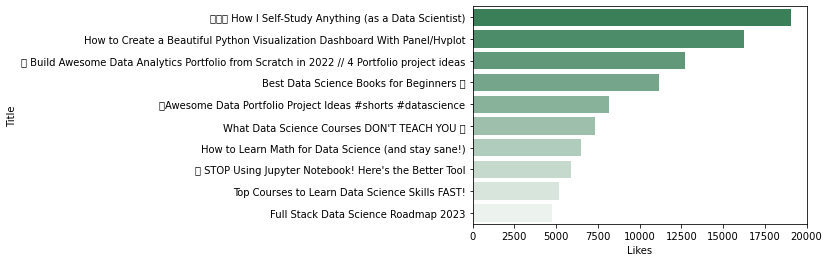

In [194]:
# Top 10 most liked videos
ax = sns.barplot(x = 'Likes', y = 'Title', data = video_data.sort_values('Likes',ascending=False).head(10),orient='h',palette=pal2)

### Analysis

The two most viewed videos are also the two most liked ones (although the position is opposite). Among 10 most-viewed videos, 8 of them are also in Top 10 most-liked rank. There seems to be a positive relationship between views and likes.

In [84]:
# Correlation model

pearsonr(video_data['Views'],video_data['Likes'])

(0.9645523317388506, 4.373795607677736e-34)

<AxesSubplot:xlabel='Views', ylabel='Likes'>

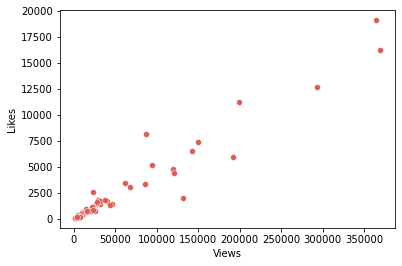

In [208]:
# Plot the graph

sns.scatterplot(data=video_data,x='Views',y='Likes')

As the result is 0.9, there is a strong positive relationship between views and likes.
The p-value < 0.01. The result is statistically significant.

We can conclude that it is likely that the more people watch a video, the more likes it might have. 

### Commonly used words 
In this part, I will use wordcloud to see most common words in video titles of the channel.

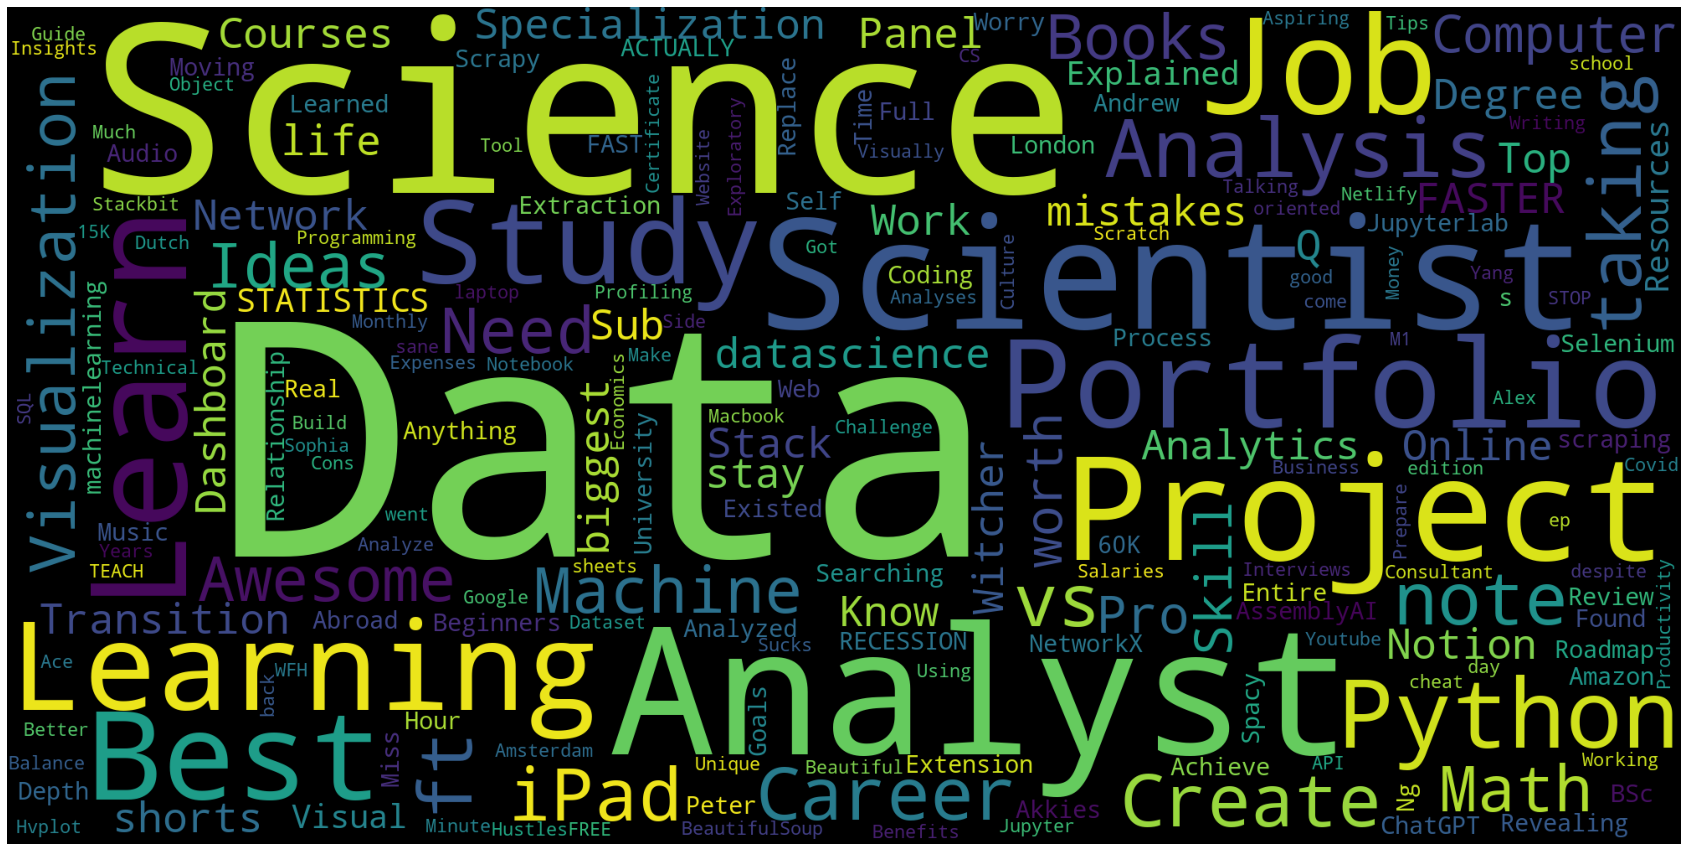

In [106]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) #set stopwords "english"
video_data['title_no_stopwords'] = video_data['Title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_data['title_no_stopwords'].tolist() for a in b]) #convert to list
all_words_str = ' '.join(all_words) #join words by space

#Word Cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1,background_color='black',colormap='viridis',collocations=False).generate(all_words_str)
plot_cloud(wordcloud)